In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime as dt

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
content=pd.read_csv('Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [5]:
content.nunique()

Unnamed: 0    1000
Content ID    1000
User ID        446
Type             4
Category        41
URL            801
dtype: int64

In [6]:
content['Type'].value_counts()

photo    261
video    259
GIF      244
audio    236
Name: Type, dtype: int64

In [7]:
content['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

## Replacing qotations to match all the values

In [8]:
content['Category'] = content['Category'].str.replace(r'"','')

### Capitalize all the categories to match the same values  

In [9]:
content['Category']=content['Category'].str.capitalize()

In [10]:
content['Category'].value_counts()

Technology         73
Animals            72
Travel             69
Science            68
Culture            67
Fitness            66
Food               64
Soccer             64
Healthy eating     62
Cooking            61
Tennis             59
Education          59
Studying           58
Dogs               58
Public speaking    50
Veganism           50
Name: Category, dtype: int64

In [11]:
content.nunique()

Unnamed: 0    1000
Content ID    1000
User ID        446
Type             4
Category        16
URL            801
dtype: int64

In [12]:
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

## We don't want the url column it wont be helping us to find the top categories so we are droping it.

In [13]:
content.drop(['URL'],axis=1,inplace=True)

In [14]:
content.drop(['Unnamed: 0'],axis=1,inplace=True)

## Changing column name Type to ContentType

In [15]:
content.rename(columns={'Type':'ContentType'},inplace=True)

In [16]:
content.drop(['User ID'],axis=1,inplace=True)

In [17]:
content.head()

,Content ID,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,Technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,Food


In [18]:
reaction=pd.read_csv('Reactions.csv')
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [19]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [20]:
reaction.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

## Finding % of null values in the dataset

In [21]:
reaction_with_nan=[feature for feature in reaction.columns if  reaction[feature].isnull().sum()]
for feature in reaction_with_nan:
    print(feature,np.round(reaction[feature].isnull().mean()*100,4), '%missing values')

User ID 11.8147 %missing values
Type 3.8352 %missing values


<AxesSubplot:>

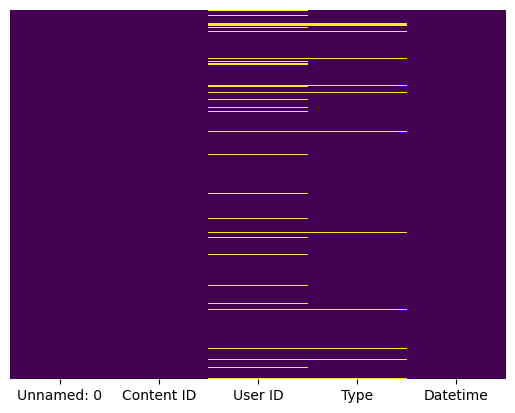

In [22]:
sns.heatmap(reaction.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### As we dont wan't the user id it won't help us in getting the top categories so we will drop it later and replace the value of Type with mode (The most frequent one).

In [23]:
reaction=reaction.copy()
reaction['Type']=reaction['Type'].fillna(reaction['Type'].mode()[0])

In [24]:
reaction.drop(['User ID'],axis=1,inplace=True)

In [25]:
reaction['Type'].isnull().sum()

0

In [26]:
reaction.nunique()

Unnamed: 0    25553
Content ID      980
Type             16
Datetime      25542
dtype: int64

In [27]:
reaction['Type'].value_counts()

heart          2602
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Type, dtype: int64

In [28]:
reaction.drop(['Unnamed: 0'],axis=1,inplace=True)

## Seperating date and time 

In [29]:
reaction['Dates'] = pd.to_datetime(reaction['Datetime']).dt.date
reaction['Time'] = pd.to_datetime(reaction['Datetime']).dt.time

In [30]:
reaction.head()

,Content ID,Type,Datetime,Dates,Time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,heart,2021-04-22 15:17:15,2021-04-22,15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,2020-11-07,09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,2021-06-17,12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,2021-04-18,05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,2021-01-06,19:13:01


In [31]:
reaction.drop(['Datetime'],axis=1,inplace=True)

In [32]:
reaction.rename(columns={'Type':'ReactionType'},inplace=True)

In [33]:
reaction.head()

,Content ID,ReactionType,Dates,Time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,heart,2021-04-22,15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,19:13:01


In [34]:
reactionTypes=pd.read_csv('ReactionTypes.csv')
reactionTypes.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [35]:
reactionTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [36]:
reactionTypes.rename(columns={'Type':'ReactionType'},inplace=True)

In [37]:
reactionTypes.drop(['Unnamed: 0'],axis=1,inplace=True)

In [38]:
reactionTypes.isnull().sum()

ReactionType    0
Sentiment       0
Score           0
dtype: int64

In [39]:
reactionTypes.head()

,ReactionType,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


# Merge all the dataframes for the final dataframe

In [40]:
final_data=pd.merge(pd.merge(reaction,content,on='Content ID'),reactionTypes,on='ReactionType')

In [41]:
final_data.head()

,Content ID,ReactionType,Dates,Time,ContentType,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,heart,2021-04-22,15:17:15,photo,Studying,positive,60
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,heart,2021-04-11,14:29:59,photo,Studying,positive,60
2,9f737e0a-3cdd-4d29-9d24-753f4e3be810,heart,2020-12-04,20:00:31,photo,Healthy eating,positive,60
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,heart,2021-06-16,03:02:28,photo,Healthy eating,positive,60
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,heart,2021-03-19,08:19:38,photo,Healthy eating,positive,60


In [42]:
final_data.isnull().sum()

Content ID      0
ReactionType    0
Dates           0
Time            0
ContentType     0
Category        0
Sentiment       0
Score           0
dtype: int64

In [75]:
total=final_data.groupby(['Category']).sum()

In [76]:
total

,Score
Category,
Animals,79165
Cooking,68356
Culture,70479
Dogs,55991
Education,60976
Fitness,59043
Food,70456
Healthy eating,73059
Public speaking,52204


In [81]:
total.sort_values(by=['Score'],ascending=False).head()

,Score
Category,
Animals,79165
Science,75248
Healthy eating,73059
Technology,72998
Culture,70479
